# Machine Learning Model (Linear Regression)

In [8]:
import os

In [9]:
os.getcwd()

'C:\\Users\\Dell'

In [10]:
os.chdir('C:\\Users\\Dell')

In [11]:
os.getcwd()

'C:\\Users\\Dell'

In [12]:
import numpy as np
import pandas as pd

In [13]:
gap=pd.read_csv("GapMinder.csv")

In [14]:
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


# Step 1

In [15]:
X=gap.drop(columns=["fertility"])

In [16]:
X.head()

,population,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [17]:
y=gap["fertility"]

In [19]:
y.head()

0    2.73
1    6.43
2    2.24
3    1.40
4    1.96
Name: fertility, dtype: float64

# Rules

In [26]:
X.dtypes

population           int64
HIV                float64
CO2                float64
BMI_male           float64
GDP                  int64
BMI_female         float64
life               float64
child_mortality    float64
Region              object
dtype: object

In [27]:
X=pd.get_dummies(X,columns=["Region"],prefix="OH")

In [28]:
X.dtypes

population                         int64
HIV                              float64
CO2                              float64
BMI_male                         float64
GDP                                int64
BMI_female                       float64
life                             float64
child_mortality                  float64
OH_America                         uint8
OH_East Asia & Pacific             uint8
OH_Europe & Central Asia           uint8
OH_Middle East & North Africa      uint8
OH_South Asia                      uint8
OH_Sub-Saharan Africa              uint8
dtype: object

In [29]:
type(X)

pandas.core.frame.DataFrame

In [30]:
X.shape

(139, 14)

In [31]:
gap.isna().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

# Step 2

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

# Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
SS=StandardScaler()

In [36]:
X_train_scaled=SS.fit_transform(X_train)

In [37]:
X_train_scaled=pd.DataFrame(X_train_scaled)

In [38]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.312734,-0.068819,-0.744820,-1.292200,-0.857275,0.825921,-0.742012,0.878850,-0.53287,-0.361158,-0.592157,-0.247436,-0.247436,1.570563
1,-0.315529,-0.252985,-0.164520,0.308032,-0.050670,0.973220,0.311602,-0.677197,-0.53287,-0.361158,-0.592157,-0.247436,-0.247436,1.570563
2,-0.193049,-0.414131,1.365213,0.699930,1.975145,-1.043987,1.184293,-0.916255,-0.53287,-0.361158,1.688743,-0.247436,-0.247436,-0.636715
3,-0.304194,-0.437152,2.399305,0.802925,2.000550,0.096452,0.577666,-0.761954,-0.53287,-0.361158,-0.592157,4.041452,-0.247436,-0.636715
4,-0.046451,-0.437152,-0.113178,0.052239,-0.192903,0.759344,0.652164,-0.379462,-0.53287,-0.361158,-0.592157,4.041452,-0.247436,-0.636715


In [39]:
X_test_scaled=SS.transform(X_test)

In [40]:
X_test_scaled=pd.DataFrame(X_test_scaled)

In [41]:
X_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.109433,-0.437152,0.122353,0.382809,-0.723325,-0.461642,-0.050245,0.048668,-0.53287,-0.361158,1.688743,-0.247436,-0.247436,-0.636715
1,-0.197890,-0.437152,2.224056,0.825602,0.207834,0.528005,-0.326952,-0.457699,-0.53287,-0.361158,1.688743,-0.247436,-0.247436,-0.636715
2,-0.290634,-0.446360,0.288831,0.965029,0.397972,0.866359,0.779875,-0.892349,-0.53287,-0.361158,1.688743,-0.247436,-0.247436,-0.636715
3,-0.049183,-0.229965,-0.717913,-0.947842,-0.753429,0.718708,-0.188599,0.820172,-0.53287,-0.361158,-0.592157,-0.247436,-0.247436,1.570563
4,-0.282860,-0.437152,1.388009,1.027598,1.649634,0.025614,1.088509,-0.948854,-0.53287,-0.361158,1.688743,-0.247436,-0.247436,-0.636715


# Step 3

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linear=LinearRegression()

In [44]:
linear.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Step 4

# Evaluate (R square)

In [46]:
linear.score(X_test_scaled,y_test)

0.9219252007966684

In [49]:
linear.predict(X_test_scaled)

array([2.64832212, 1.99350414, 1.46520867, 4.99662707, 1.46037235,
       2.3626865 , 5.7068315 , 1.68350662, 5.19670163, 2.6522986 ,
       1.55307417, 4.69084012, 5.41399225, 5.99864994, 4.70313913,
       2.27704667, 1.66635568, 5.27097366, 2.18983239, 1.46869637,
       2.91776152, 2.00086662, 6.47483269, 1.4284726 , 1.51341575,
       2.41721951, 1.52177642, 2.58710335, 2.57943261, 1.71274184,
       1.66421702, 1.59116224, 1.82102726, 1.5527215 , 1.8589841 ])

# Cross Validation (Alternative to train_test_split)

# Step 1

In [54]:
X=gap.drop(columns=["fertility"])

In [55]:
X.head()

,population,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [56]:
y=gap["fertility"]

In [58]:
y.head()

0    2.73
1    6.43
2    2.24
3    1.40
4    1.96
Name: fertility, dtype: float64

# Rules

In [60]:
X.dtypes

population           int64
HIV                float64
CO2                float64
BMI_male           float64
GDP                  int64
BMI_female         float64
life               float64
child_mortality    float64
Region              object
dtype: object

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
label=LabelEncoder()

In [63]:
X["Region"]=label.fit_transform(X["Region"])

In [64]:
X.dtypes

population           int64
HIV                float64
CO2                float64
BMI_male           float64
GDP                  int64
BMI_female         float64
life               float64
child_mortality    float64
Region               int32
dtype: object

In [65]:
type(X)

pandas.core.frame.DataFrame

In [66]:
X.shape

(139, 9)

In [67]:
gap.isna().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
SS=StandardScaler()

In [70]:
X_scaled=SS.fit_transform(X)

In [71]:
X_scaled=pd.DataFrame(X_scaled)

In [73]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-0.006312,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,0.626793,-0.342343,0.244296
1,-0.143492,0.019209,-0.478008,-1.077595,-0.498262,0.768150,-1.243534,3.224390,1.322302
2,0.044742,-0.322236,0.052083,1.307639,-0.104127,-1.752833,0.648797,-0.651826,-1.372712
3,-0.298071,-0.413288,-0.425211,0.332681,-0.483632,1.370971,0.318739,-0.550860,-0.294706
4,-0.129488,-0.413288,2.170503,1.335817,1.289221,-2.093057,1.308913,-0.875707,-0.833709


# Step 2 and 3

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
linear=LinearRegression()

In [77]:
cv_scores=cross_val_score(linear,X_scaled,y,cv=5)                     #It will give an array of 5 scores

In [80]:
cv_scores

array([0.87289151, 0.84260825, 0.84193558, 0.70949485, 0.81502439])

In [81]:
np.mean(cv_scores)

0.8163909165590049

# Regularized Regression (Lasso Regression)

In [82]:
from sklearn.linear_model import Lasso

In [83]:
lasso=Lasso(alpha=0.4)

In [84]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
lasso_coef=lasso.coef_                             #Prints all the coeffients of each Feature

In [88]:
lasso_coef                                         #9 Features so u will get 9 Coefficients

array([-0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  1.05132225,  0.        ])

In [90]:
X.columns

Index(['population', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'life',
       'child_mortality', 'Region'],
      dtype='object')

In [91]:
len(X.columns)

9

In [92]:
range(9)

range(0, 9)

In [93]:
list(range(9))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [94]:
ks=list(range(len(X.columns)))

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

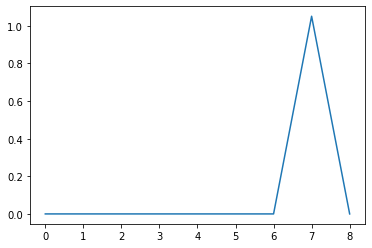

In [96]:
plt.plot(ks,lasso_coef)
plt.show()